                                                          
                                                          WSTĘP
                                                                                                                    

Uczenie maszynowe - dziedzina nauki zajmująca się programowaniem komputerów w sposób umożliwiający im uczenie się z danych
                    bez konieczności ich jawnego programowania.

Zastosowanie uczenia maszynowego (ML):
     
 - problemy, których rozwiązanie wymaga częstego dostrajania algorytmu lub korzystania z długich list reguł
   (model ML upraszcza aplikację i poprawia jej szybkość w stosunku do podejścia tradycyjnego),
                    
 - problemy złożone, których nie można rozwiązać tradycyjnymi metodami (najlepsze algorytmy ML są w stanie
   znaleźć rozwiązanie),
                    
 - przy zmiennych środowiskach (mechanizm ML można z łatwością wytrenować za pomocą nowych danych i aktualizować
   w dowolnym momencie),
                    
 - analiza skompikowanych zagadnień i olbrzymich ilości danych.
        

Rodzaje systemów ML - podział wg kryteriów:
 
  - sposób ich nadzorowania w fazie uczenia (uczenie nadzorowane, niezadzorowane, półnadzorowane,                                   samonadzorowane.),
                  
  - możliwość uczenia się w czasie rzeczywistym (uczenie przyrostowe i wsadowe),
                  
  - sposób pracy: porównywanie nowych punktów danych ze znanymi punktami lub wykrywanie wzorców w danych 
                  i tworzenie modelu predykcyjnego.


  Niniejsze opracowanie bazuje na uczeniu nadzorowanym - dane uczące przekazywane algorytmowi zawierają dołączone rozwiązania problemu, tzw. etykiety (tutaj: "0" i "1"). Zadaniem wykorzystanych algorytmów jest klasyfikacja.  Model jest trenowany za pomocą dużej liczby przykładowych cech ilościowych należących do danej klasy (tu: "0" i "1"), dzięki którym powinien być w stanie klasyfikować nowe obiekty (tu: pracownik odchodzący z pracy lub pozostający).  
  
  Wykorzystano różne rodzaje powszechnie stosowanych algorytmów uczenia maszynowego celem porównania skuteczności działania każdego z nich na bazie dostępnego zbioru danych "Attrition".


                                             REGRESJA  LOGISTYCZNA:

   Algorytm regresji logistycznej (RL) to metoda statystyczna, która słuzy do przewidywania prawdopodobieństwa zmiennej zależnej
na skali tzw. dychotomicznej (np. tak/nie, 0/1) na podstawie jednej lub więcej zmiennych niezależnych. RL wykorzystuje fukcję
logistyczną (sigmoidalną), która przekształca dowolną wartość wejściwą do wartości z przedziału (0, 1). Do jej zalet można 
zaliczyć m.in. łatwość interpretacji, szybkość obliczeń i odporność na szum. Do słabych stron: trudność w modelowaniu zależności nieliniowych, wielowymiarowych lub skomplikowanych. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [3]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]


In [5]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
Xlog = train_data
ylog = train_labels

In [7]:
Xlog.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [8]:
ylog.value_counts()

Attrition
0            1595
1            1402
Name: count, dtype: int64

In [9]:
# Dzielimy zbiór X na treningowy i testowy:

Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(Xlog, ylog, stratify=ylog)

In [10]:
# Trenujemy model na danych treningowych:
from sklearn.datasets import make_classification

model = LogisticRegression(random_state=30, max_iter=1000)

# Parametr 'random_state' służy do ustawienia ziarna losowego dla algorytmu optymalizacji. Ustawienie go na stałą liczbę
# zapewnia, że model będzie dawał takie same wyniki przy każdym uruchomieniu (bez tego model będzie używał różnych ziaren 
# losowych za każdym razem, co może prowadzić do różnych wyników).

model.fit(Xlog_train, ylog_train.values.ravel())

LogisticRegression(max_iter=1000, random_state=30)

In [11]:
y_pred_train = model.predict(Xlog_train)
y_pred = model.predict(Xlog_test)
print(y_pred)
# print(ylog_test.values)

[0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 1 1 0 0 0 1 1 1 1 0 

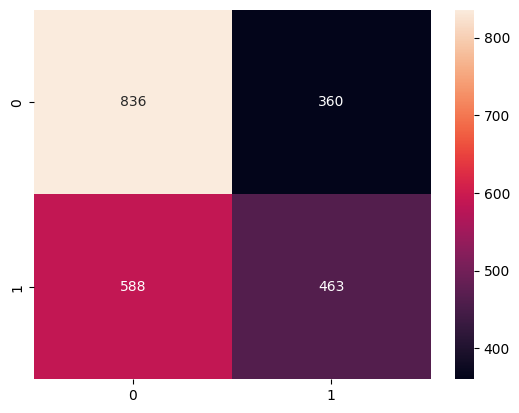

In [11]:
#  Metryki klasyfikacji:

from sklearn.metrics import confusion_matrix

cmlog_train = confusion_matrix(ylog_train, y_pred_train)
sns.heatmap(cmlog_train, annot=True, fmt='d')
plt.show()


Macierz pomyłek (ang. confusion matrix) jest narzędziem do oceny jakości modelu klasyfikacji. Pokazuje liczbę prawdziwie pozytywnych,fałszywie negatywnych, fałszywie pozytywnych i prawdziwie negatywnych przewidywań modelu. 

TP - prawdziwie pozytywne 
FP - fałszywie pozytywne 
FN - fałszywie negatywne 
TN - prawdziwie negatywne

In [12]:
cmlog_train

array([[836, 360],
       [588, 463]], dtype=int64)

<Axes: >

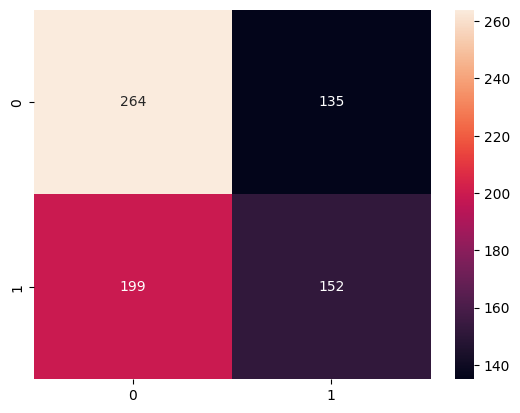

In [13]:
cmlog = confusion_matrix(ylog_test, y_pred)
sns.heatmap(cmlog, annot=True, fmt='d')

In [14]:
cmlog

array([[264, 135],
       [199, 152]], dtype=int64)

Inne metryki klasyfikacji:

Accuracy: tj. dokładność, oznacza stosunek liczby poprawnych przewidywań modelu do całkowitej liczby przewidywań. Metryka ta
                          jest użyteczna, gdy wszystkie klasy są równie ważne i zrównoważone. Jednak może być myląca przy
                          niezrównoważonych zbiorach danych lub gdy koszt błędu jest różny dla różnych klas.

Precision: tj. precyzja, określa proporcję poprawnych przewidywań wśród wszystkich przewidywań pozytywnych. Jest to
                         stosunek liczby prawdziwie pozytywnych przewidywań do sumy prawdziwie pozytywnych i fałszywie
                         pozytywnych przewidywań. 
                         Metryka ta jest użyteczna, gdy chcemy zmniejszyć liczbę fałszywych alarmów (fałszywie pozytywne
                         przewidywania, które obniżają jej wartość) lub gdy koszt fałszywie pozytywnego błędu jest wysoki.                              Jeśli jednak chcemy zmaksymalizować liczbę poprawnie wykrytych przypadków pozytywnych lub gdy koszt                            fałszywie negatywnego błędu jest wysoki, lepiej użyć metryki 'Recall' (czułość).
                         
Recall: tj. czułość, określa proporcję poprawnych przewidywań wśród wszystkich przypadków pozytywnych. Jest to stosunek liczby
                     prawdziwie pozytywnych przewidywań do sumy prawdziwie pozytywnych i fałszywie negatywnych przewidywań. 
                     
F1_Score: tj. współczynnik F1, łączy w sobie metryki 'Precision' i 'Recall', obliczając ich średnią harmoniczną. Jest to
              stosunek dwukrotności iloczynu precision i recall do sumy precision i recall.
              F1-Score jest użyteczne, gdy chcemy zrównoważyć obie metryki i ocenić model pod kątem jego zdolności do 
              poprawnego przewidywania przypadków pozytywnych. Im wyższe F1-Score, tym lepszy jest model. F1-Score nie 
              uwzględnia prawdziwie negatywnych przewidywań, więc może być myląca w przypadku niezrównoważonych zbiorów danych.


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [29]:
LogMetrics1 = calculate_metrics(ylog_test.values, y_pred)
LogMetrics = print_results(calculate_metrics(ylog_test.values, y_pred), 'Log')
LogMetrics

Results for Log
----
  Accuracy:  0.5653333333333334
  Precision: 0.5612674235479398
  Recall:    0.55583402951824
  F1 score:  0.5501015721603957
  Mislabeled 275778 out of 750




Niska wartość współczynnika F1 może świadczyć o tzw. niedotrenowaniu modelu, czyli sytuacji gdy model nie nauczył się wystarczająco dobrze z danych treningowych i ma przez to duży błąd dopasowania. Oznacza to, że jest zbyt prosty lub ma zbyt mało parametrów, aby dobrze odwzorować zależności w danych. Ma niską zdolność generalizacji i nie potrafi poradzić sobie z danymi, których dotąd nie widział. Sposobami na rozwiązanie tego problemu mogą być:

  - wybór bardziej złożonego modelu, który wykorzystuje większą liczbę parametrów (tu: w kolejnych etapach projektu),
  - Feature Engineering, czyli dołączenie większej liczby cech do algorytmu uczącego,
  - zwiększenie liczby danych treningowych,
  - optymalizacja hiperparametrów.

                                        NAIWNY KLASYFIKATOR BAYESOWSKI:

  Naiwny klasyfikator bayesowski to klasyfikator probabilistyczny, który opiera się na twierdzeniu Bayesa o prawdopodobieństwie warunkowym. Zakłada, że cechy (zmienne niezależne) są wzajemnie niezależne i nie mają wpływu na siebie nawzajem. To założenie jest często niespełnione w rzeczywistości, dlatego nazywa się je naiwnym. Klasyfikator jest prosty w implementacji i często daje dobre wyniki, zwłaszcza przy dużym zbiorze danych i wielu wymiarach.

In [20]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [22]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [23]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [24]:
XBay = train_data
yBay = train_labels

In [25]:
XBay_train, XBay_test, yBay_train, yBay_test = train_test_split(XBay, yBay, test_size=0.2, stratify=yBay)

In [26]:
# Klasyfikator Gaussowski lepiej nadaje się do danych ciągłych 
# (dane, które mogą przyjmować dowolną wartość z pewnego przedziału)

gnb = GaussianNB()  
gnb.fit(XBay_train, yBay_train)
y_gnb = gnb.predict(XBay_test)
# print(yBay_test.values)
print(y_gnb)
print(confusion_matrix(yBay_test,y_gnb))

[0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
GNBMetricsBayes1 = calculate_metrics(yBay_test.values, y_gnb)
GNBMetricsBayes = print_results(calculate_metrics(yBay_test.values, y_gnb), 'GNB')
GNBMetricsBayes

Results for GNB
----
  Accuracy:  0.505
  Precision: 0.5007918552036199
  Recall:    0.5007809100949363
  F1 score:  0.5001668915261178
  Mislabeled 178480 out of 600




In [31]:
cm_gnbBay = confusion_matrix(yBay_test, y_gnb)
print(cm_gnbBay)

[[181 138]
 [159 122]]


<Axes: >

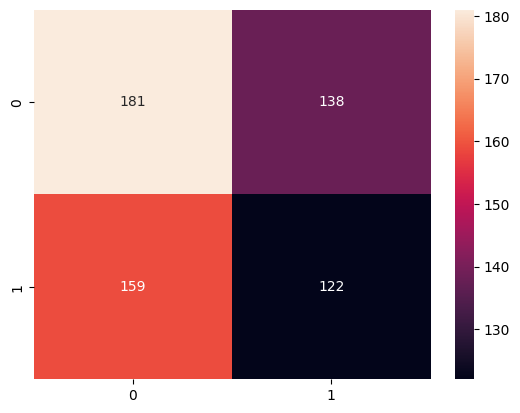

In [32]:
cm_gnbBay = confusion_matrix(yBay_test, y_gnb)
sns.heatmap(cm_gnbBay, annot=True, fmt='d')

In [29]:
# Sprawdźmy jak poradzi sobie nasz model po dyskretyzacji danych (przekształcenie zmiennej ciągłej na dyskretną - taka, która
# przyjmuje wartości ze skończonego zbioru wartości):

In [33]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(XBay)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([19. , 23.1, 27.2, 31.3, 35.4, 39.5, 43.6, 47.7, 51.8, 55.9, 60. ])
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ])
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ])
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ])
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.])
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])
 array([11. , 12.4, 13.8, 15.2, 16.6, 18. , 19.4, 20.8, 22.2, 23.6, 25. ])
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ])
 array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ])
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ])
 array

In [34]:
X_binned = kb.transform(XBay)
X_binned

<2997x460 sparse matrix of type '<class 'numpy.float64'>'
	with 137862 stored elements in Compressed Sparse Row format>

In [35]:
print(XBay[:10])
X_binned.toarray()[:10]

   Age  DistanceFromHome  Education  EnvironmentSatisfaction  JobInvolvement   
0   30                 1          1                        4               2  \
1   38                 2          2                        4               2   
2   26                 6          3                        3               2   
3   28                 8          2                        4               3   
4   35                 4          2                        3               3   
5   34                 9          4                        1               3   
6   32                 3          2                        3               3   
7   42                 2          3                        4               2   
8   34                 6          2                        4               1   
9   40                 4          1                        4               3   

   JobLevel  JobSatisfaction  MonthlyIncome  NumCompaniesWorked   
0         2                4           5126         

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
X_binned_train, X_binned_test, yBay_train, yBay_test = train_test_split(X_binned, yBay, test_size=0.2, stratify=yBay)

In [37]:
# Mamy dane dyskretne, więc lepiej sprawdzi się tu Klasyfikator Multinomialny:

mnb = MultinomialNB()

mnb.fit(X_binned_train, yBay_train)
y_mnb = mnb.predict(X_binned_test)
#print(yBay_test.values)
print(y_mnb)
print(confusion_matrix(yBay_test,y_mnb))


[0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1
 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 1 

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
MNBMetricsBayes1 = calculate_metrics(yBay_test.values, y_mnb)
MNBMetricsBayes = print_results(calculate_metrics(yBay_test.values, y_mnb), 'MNB')
MNBMetricsBayes

Results for MNB
----
  Accuracy:  0.5766666666666667
  Precision: 0.5735720375106564
  Recall:    0.5722062941353652
  F1 score:  0.5717946412515734
  Mislabeled 178290 out of 600




In [36]:
# Wynik F1-Score dla 'MNB' lepszy niż dla 'GNB'.

In [39]:
cm_mnbBay = confusion_matrix(yBay_test, y_mnb)
print(cm_mnbBay)

[[205 114]
 [140 141]]


<Axes: >

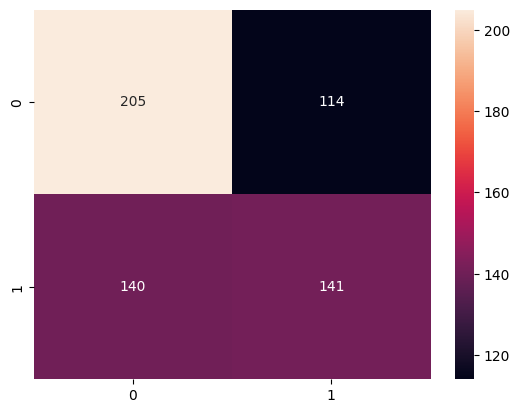

In [40]:
cm_mnbBay = confusion_matrix(yBay_test, y_mnb)
sns.heatmap(cm_mnbBay, annot=True, fmt='d')

                                         KNN (k-najbliższych sąsiadów)

  Algorytm KNN (k-najbliższych sąsiadów) polega na tym, że każdy punkt danych jest przypisywany do klasy lub wartości, która jest najczęstsza lub średnia wśród jego k najbliższych sąsiadów, gdzie k jest parametrem, który określa liczbę sąsiadów branych pod uwagę. Aby znaleźć k najbliższych sąsiadów, KNN używa miary odległości, takiej jak odległość euklidesowa lub manhattanowska.

In [41]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [43]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

XkNN = train_data
ykNN = train_labels

In [42]:
# W przypadku KNN dobrą praktyką jest standaryzacja danych:

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

XkNN = scaler.fit_transform(XkNN)

print(XkNN)

[[-0.78272417 -1.00899073 -1.86321492 ... -0.66972073 -1.61044254
   1.61044254]
 [ 0.10103353 -0.88497215 -0.89106048 ... -0.66972073 -1.61044254
   1.61044254]
 [-1.22460301 -0.38889779  0.08109396 ... -0.66972073  0.62094733
  -0.62094733]
 ...
 [-0.23037561 -0.14086062  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]
 [ 0.43244266  2.33951114  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]
 [ 0.43244266  2.33951114  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]]


In [45]:
XkNN_train, XkNN_test, ykNN_train, ykNN_test = train_test_split(XkNN, ykNN, test_size=0.2, stratify=ykNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(XkNN_train, ykNN_train.values.ravel())

pred_knn = knn.predict(XkNN_test)

In [47]:
pred_knn

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [48]:
len(ykNN_test)

600

In [49]:
type(ykNN_test)

pandas.core.frame.DataFrame

In [50]:
len(pred_knn)

600

In [51]:
type(pred_knn)

numpy.ndarray

In [52]:
ykNN_test = ykNN_test.to_numpy()

In [53]:
type(ykNN_test)

numpy.ndarray

In [54]:
KNNMetrics1 = calculate_metrics(ykNN_test, pred_knn)
KNNMetrics = print_results(calculate_metrics(ykNN_test, pred_knn), 'kNN')
KNNMetrics

Results for kNN
----
  Accuracy:  0.5316666666666666
  Precision: 0.529874213836478
  Recall:    0.5298865449190643
  F1 score:  0.5298789005969924
  Mislabeled 179316 out of 600




Na wpływ wyników mogą mieć wpływ różne czynniki, m.in.: wpływ kroswalidacji, normalizacji, ilości sąsiadów, metody mierzenia odległości (Euklidesa, Manhattan, Czebyszewa, Mińkowskiego), sposobu głosowania (większościowe, ważone, ważone do kwadratu).

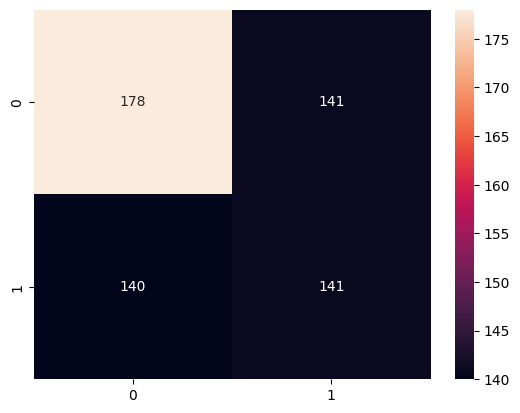

In [55]:
cmkNN_train = confusion_matrix(ykNN_test, pred_knn)
sns.heatmap(cmkNN_train, annot=True, fmt='d')
plt.show()

In [56]:
cmkNN_train

array([[178, 141],
       [140, 141]], dtype=int64)

<Axes: >

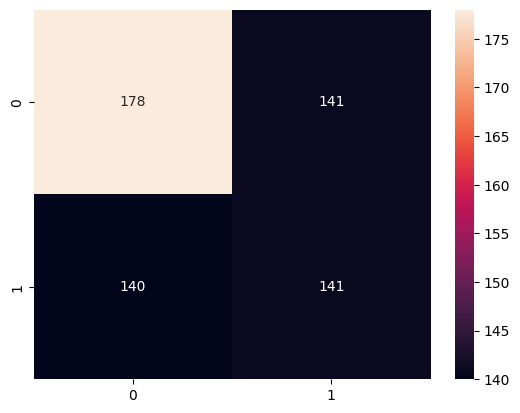

In [57]:
cmkNN = confusion_matrix(ykNN_test, pred_knn)
sns.heatmap(cmkNN, annot=True, fmt='d')

                                          SVM (Maszyna Wektorów Nośnych)

  Maszyna Wektorów Nośnych (SVM) polega na znalezieniu hiperpłaszczyzny, która najlepiej oddziela dane na różne klasy z maksymalnym marginesem. Hiperpłaszczyzna to płaszczyzna o wymiarze o jeden mniejszym niż przestrzeń, w której się znajduje. SVM wykorzystuje wektory nośne, które są punktami danymi najbliższymi hiperpłaszczyźnie, do określenia położenia i kształtu hiperpłaszczyzny. 
  
  Zalety SVM:
  
  - odporny na szumy i nieliniowość danych, dzięki czemu może generować dokładne wyniki klasyfikacji,
  - wydajny pod względem pamięci, ponieważ wykorzystuje tylko podzbiór punktów danych zwanych wektorami nośnymi do 
    określeia hiperpłaszczyzny.
    
  Wady SVM:
  
  - może być trudny do zrozumienia i interpretacji, ponieważ nie daje jasnego wglądu w to, jak dane są rozdzielane,
  - może być czasochłonny i wymagać dużej mocy obliczeniowej, zwłaszcza gdy dane są bardzo duże lub mają wiele wymiarów.
  

In [58]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [60]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [61]:
from sklearn import svm

X = train_data
y = train_labels

Xsvm = X
ysvm = y

In [62]:
# Również dla SVM wykonujemy standaryzację:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xsvm = scaler.fit_transform(Xsvm)

print(Xsvm)

[[-0.78272417 -1.00899073 -1.86321492 ... -0.66972073 -1.61044254
   1.61044254]
 [ 0.10103353 -0.88497215 -0.89106048 ... -0.66972073 -1.61044254
   1.61044254]
 [-1.22460301 -0.38889779  0.08109396 ... -0.66972073  0.62094733
  -0.62094733]
 ...
 [-0.23037561 -0.14086062  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]
 [ 0.43244266  2.33951114  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]
 [ 0.43244266  2.33951114  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]]


In [63]:
Xsvm_train, Xsvm_test, ysvm_train, ysvm_test = train_test_split(Xsvm, ysvm, test_size=0.2, stratify=ysvm)

In [64]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


clf = SVC(kernel='linear')

clf.fit(Xsvm_train, ysvm_train.values.ravel())

ysvm_pred = clf.predict(Xsvm_test)

accuracy = accuracy_score(ysvm_test, ysvm_pred)

print(f"Dokładność klasyfikacji: {accuracy}")


Dokładność klasyfikacji: 0.5583333333333333


In [65]:
def calculate_metricsSVM(target, prediction, average='macro'):
    accuracy = accuracy_score(target.ravel(), prediction.ravel())
    precision = precision_score(target.ravel(), prediction.ravel(), average=average)
    recall = recall_score(target.ravel(), prediction.ravel(), average=average)
    f1 = f1_score(target.ravel(), prediction.ravel(), average=average)
    mislabeled = (target.ravel() != prediction.ravel()).sum()
    total = len(target.ravel())
    return accuracy, precision, recall, f1, mislabeled, total
def print_resultsSVM(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [66]:
SVMMetrics1 = calculate_metricsSVM(ysvm_test.values, ysvm_pred)
SVMMetrics = print_resultsSVM(calculate_metricsSVM(ysvm_test.values, ysvm_pred), 'svm')
SVMMetrics

Results for svm
----
  Accuracy:  0.5583333333333333
  Precision: 0.5558594421215419
  Recall:    0.5435190040049531
  F1 score:  0.5240646673391623
  Mislabeled 265 out of 600




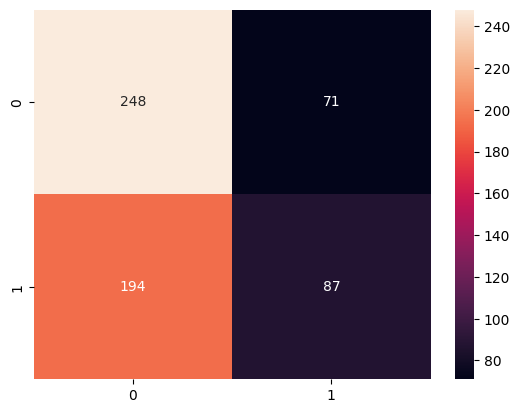

In [67]:
cmsvm_train = confusion_matrix(ysvm_test, ysvm_pred)
sns.heatmap(cmsvm_train, annot=True, fmt='d')
plt.show()

<Axes: >

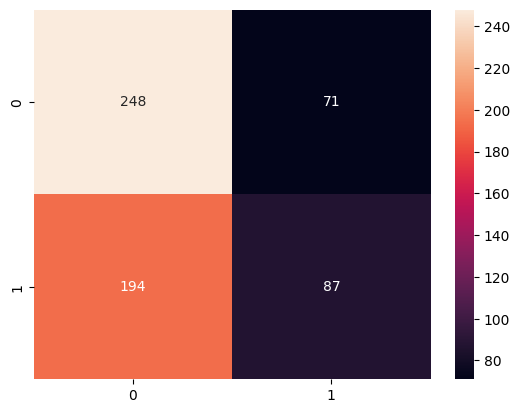

In [68]:
cmsvm = confusion_matrix(ysvm_test, ysvm_pred)
sns.heatmap(cmsvm, annot=True, fmt='d')

                                                DRZEWA DECYZYJNE

  Drzewa decyzyjne (DD) to metoda polegająca na tworzeniu modeli klasyfikacji (lub regresji) w postaci hierarchicznej struktury graficznej. Drzewa decyzyjne skłądają się z węzłów, które reprezentują atrybuty lub zmienne, i gałęzi, które reprezentują wartości lub przedziały tych atrybutów. Każdy węzeł podzielony jest na podwęzły wg danego kryterium, takiego jak entropia, przyrost informacji czy indeks Giniego. Każdy liść drzewa oznacza klasę lub wartość docelową, do której należy przykład, który dotarł do tego liścia. 
  
  Zalety:
  
  - łatwe do zrozumienia i interpretacji, ponieważ odzwierciedlają naturalny sposób myślenia ludzkiego,
  
  - szybkie i efektywne w działaniu, ponieważ wymagają niewiele obliczeń i pamięci,
  
  - zdolne do radzenia sobie z danymi o różnych typach i skalach, takimi jak liczby, kategorie, teksty czy obrazy,
  
  - wrażliwe na zmiany danych i mogą się dostosowywać do nowych sytuacji.
  
  Wady:
  
  - podatne na nadmierne dopasowanie do danych treningowych, jeśli nie są odpowiednio przycięte lub walidowane,
  
  - mogą być niestabilne i zmieniać się znacznie przy niewielkich zmianach danych,
  
  - mogą mieć trudności z uchwyceniem złożonych zależności między atrybutami lub liniowych funkcji.
  
  

In [69]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [71]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [72]:
XDD = train_data
yDD = train_labels

In [73]:
XDD_train, XDD_test, yDD_train, yDD_test = train_test_split(XDD, yDD, test_size=0.2, stratify=yDD, random_state=42)

In [74]:
dd = DecisionTreeClassifier()
dd.fit(XDD_train, yDD_train)
pred = dd.predict(XDD_test)

In [75]:
yDD_pred_train = dd.predict(XDD_train)

In [76]:
DDMetrics1 = calculate_metrics(yDD_train.values, yDD_pred_train)
DDMetrics = print_results(calculate_metrics(yDD_train.values, yDD_pred_train), 'Decision Tree Train')
DDMetrics

Results for Decision Tree Train
----
  Accuracy:  0.818523153942428
  Precision: 0.8251271977611454
  Recall:    0.8133453952611724
  F1 score:  0.8152718981448263
  Mislabeled 2835527 out of 2397




In [76]:
# Wynik F1-Score jest już znacznie lepszy niż w przypadku poprzednich algorytmów.

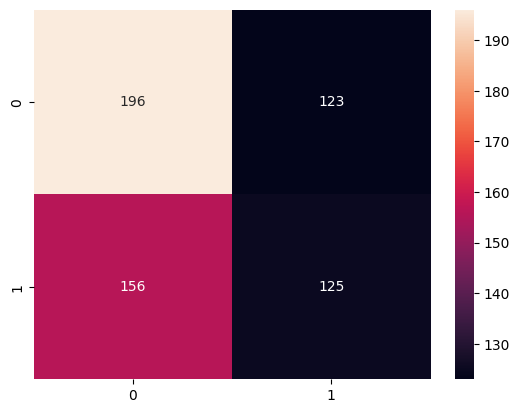

In [77]:
cmDD_train = confusion_matrix(yDD_test, pred)
sns.heatmap(cmDD_train, annot=True, fmt='d')
plt.show()

In [78]:
cmDD_train

array([[196, 123],
       [156, 125]], dtype=int64)

<Axes: >

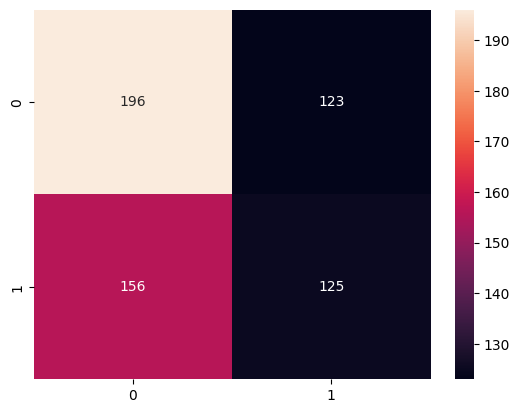

In [79]:
cmDD = confusion_matrix(yDD_test, pred)
sns.heatmap(cmDD, annot=True, fmt='d')

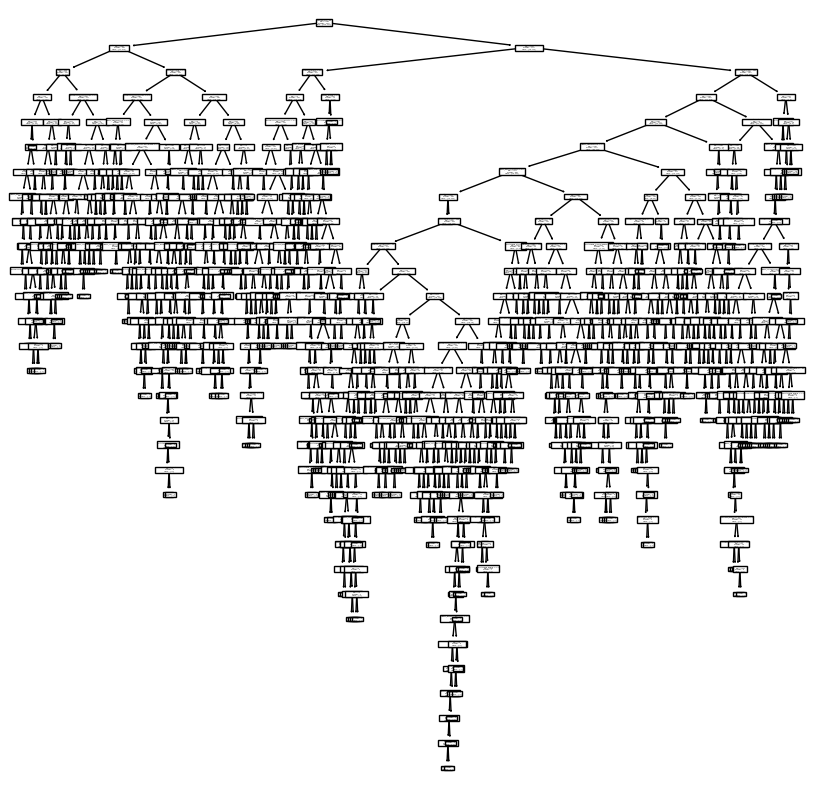

In [80]:
plt.figure(figsize=(10, 10))
plot_tree(dd, feature_names=list(XDD))
plt.show()

                                              ZESPOŁY KLASYFIKATORÓW

  Zespoły klasyfikatorów to techniki, które łączą wiele modeli uczenia się w celu uzyskania lepszej dokładności niż pojedynczy model. Mogą być podzielone na dwie główne kategorie: metody agregacji i metody wzmacniania.
  
  Metody agregacji - polegają na tworzeniu wielu modeli uczenia się z różnymi podzbiorami danych lub różnymi algorytmami, a następnie łączeniu ich wyników za pomocą głosowania, średniej lub innej reguły. Przykłady: bagging, bootstrap, random forest.
  
  Metody wzmacniania - polegają na iteracyjnym tworzeniu modeli uczenia się, któe poprawiają się na podstawie błędów poprzednich modeli. Przykłady: boosting, adaptive boosting, gradient boosting.
  
  Zalety:
  
  - zmniejszają ryzyko nadmiernego dopasowania do danych treningowych, ponieważ wykorzystują wiele modeli z różnymi cechami
    i parametrami,
   
  - zwiększają stabilność i niezawodność wyników, ponieważ redukują wpływ losowych błędów lub szumów danych,
  
  - poprawiają wydajność skalowalność, ponieważ mogą być łatwo zrównoleglone i rozproszone na wielu maszynach lub platformach.
  
  Wady:
  
  - zwiększają złożoność i koszt obliczeniowy, ponieważ wymagają więcej czasu i zasobów do trenowania i testowania wielu 
    modeli,
    
  - utrudniają interpretację i wyjaśnianie wynikó, ponieważ trudno jest prześledzić, jak poszczególne modele wpływają na 
    ostateczną decyzję.
  

In [81]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

                                                  Bootstrap

  Algorytm Bootstrap to metoda statystyczna, która polega na wielokrotnym losowaniu próbek z danego zbioru danych z powtórzeniami i obliczaniu na nich żądanej statystyki, takiej jak średnia, mediana, odchylenie standardowe czy przedział ufności. Algorytm pozwala na oszacowanie niepewności i błędu statystyki bez założeń o rozkładzie danych lub modelu.

In [82]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [83]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [84]:
Xboot = train_data
yboot = train_labels

In [85]:
data = Xboot
data = data.values.flatten()

def bootstrap(data, num_samples, sample_size, statistic):
    
    statistics = np.empty(num_samples)
    
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        statistics[i] = statistic(sample)
    return statistics
    
bootstrap(data, num_samples=1000, sample_size=5, statistic=np.mean)

array([5.6000e+00, 1.3400e+01, 1.2000e+00, 4.2940e+02, 4.8000e+00,
       4.9040e+02, 2.0000e-01, 8.0000e-01, 2.0000e+00, 2.1762e+03,
       6.8000e+00, 1.2000e+00, 4.0000e-01, 4.8300e+02, 3.8000e+00,
       8.0000e-01, 2.2000e+00, 2.0000e-01, 2.6000e+00, 3.6000e+00,
       1.6000e+00, 6.8000e+00, 1.2000e+00, 9.6000e+00, 2.0928e+03,
       2.6000e+00, 2.0000e+00, 4.0000e-01, 1.2000e+00, 9.9640e+02,
       2.0000e+00, 2.2000e+00, 5.0000e+00, 6.0000e-01, 7.2060e+02,
       3.0000e+00, 2.9628e+03, 3.0000e+00, 2.0000e-01, 2.0000e-01,
       6.0000e-01, 7.8000e+00, 8.6000e+00, 7.4000e+00, 4.7040e+02,
       1.4000e+00, 1.4000e+00, 1.2000e+00, 1.2000e+00, 1.2000e+00,
       3.8000e+00, 3.8000e+00, 1.8000e+00, 4.0000e-01, 1.0000e+00,
       1.4000e+00, 7.2520e+02, 1.0000e+00, 1.0000e+00, 2.6000e+00,
       8.0000e-01, 4.2000e+00, 1.1600e+01, 1.8000e+00, 9.0000e+00,
       3.4000e+00, 6.4400e+02, 2.0140e+03, 7.4000e+00, 1.6000e+00,
       3.6000e+00, 5.3240e+02, 1.4000e+00, 7.2000e+00, 4.0000e

                                                   Bagging

  Algorytm Bagging to metoda, która polega na tworzeniu zespołu klasyfikatorów z różnych podpróbek danych uczących i łączeniu ich wyników za pomocą głosowania lub średniej. Algorytm ma na celu zmniejszenie wariancji i poprawienie dokładności pojedynczego klasyfikatora, który może być niestabilny lub podatny na nadmierne dopasowanie. 
  
  Schemat działania:
  
  1. Wybieramy liczbę klasyfikatorów do utworzenia.
  
  2. Dla każdego klasyfikatora:
  
     - losujemy losową próbkę danych uczących z powtórzeniami,
     
     - budujemy klasyfikator na podstawie wylosowanej podpróbki (np. drzewo decyzyjne).
     
  3. Dla nowej obserwacji do sklasyfikowania:
  
     - stosujemy wszystkie klasyfikatory do obserwacji i zbieramy ich wyniki,
     
     - zwracamy klasę, która otrzymałą najwięcej głosów (dla klasyfikacji) lub średnią z wyników (dla regresji).
     
  Zalety:
  
     - zmniejsza ryzyko nadmiernego dopasowania i poprawia ogólność kasyfikatora,
     
     - jest łatwy do zaimplementowania i zrównoleglenia,
     
     - nie wymaga strojenia hiperparametrów ani przycinania klasyfikatorów bazowych.
     
   Wady:
   
     - zwiększa koszt obliczeniowy i pamięciowy, ponieważ wymaga tworzenia i przechowywania wielu klasyfikatorów,
     
     - może nie poprawić dokładności klasyfikatora, jeśli dane są zaszumione lub niezrównoważone,
     
     - może nie radzić sobie dobrze z zależnościami między zmiennymi lub nieliniowymi funkcjami.
  
  

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [87]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [88]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [89]:
Xbag = train_data
ybag = train_labels

In [90]:
Xbag_train, Xbag_test, ybag_train, ybag_test = train_test_split(Xbag, ybag, test_size=0.2, stratify=ybag, random_state=42)

In [91]:
Xbag_train, ybag_train = make_classification(n_samples=100, n_features=46, n_informative=46, n_redundant=0, random_state=0, shuffle=True)

In [92]:
clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
clf1.fit(Xbag_train, ybag_train)

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

In [93]:
pred_bag = clf1.predict(Xbag_test)
pred_bag

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [94]:
BAGMetrics1 = calculate_metrics(ybag_test.values, pred_bag)
BAGMetrics = print_results(calculate_metrics(ybag_test.values, pred_bag), 'Bagging')
BAGMetrics

Results for Bagging
----
  Accuracy:  0.5316666666666666
  Precision: 0.2658333333333333
  Recall:    0.5
  F1 score:  0.3471164309031556
  Mislabeled 168600 out of 600




C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
print(clf.predict([[45, 23, 2, 2, 3, 3, 4, 2344, 2, 2, 3, 2, 24, 1, 2, 10, 5, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]]))

[0]


                                                   Random Forest

  Random Forest (RF) to metoda, która polega na tworzeniu zespołu drzew decyzyjnych na różnych podzbiorach danych i łączeniu ich wyników za pomocą głosowania lub średniej. RF ma na celu poprawić dokładność i ogólność pojedynczego drzewa decyzyjnego, które noże być niestabilne lub podatne na nadmierne dopasowanie.
  
  Schemat działania:
  
  1. Wybieramy liczbę drzew do utworzenia.
  
  2. Dla każdego drzewa:
  
     - losujemy losowy podzbiór danych z powtózeniami,
     
     - budujemy drzewo decyzyjne na podstawie wylosowanego podzbioru, wybierając losowo pewną liczbę cech do rozważenia przy
       każdym podziale (np. pierwiastek z liczby wszystkich cech).
       
   3. Dla nowej obserwacji do sklasyfikowania lub oszacowania:
   
     - stosujemy wszystkie drzewa do obserwacji i zbieramy ich wyniki,
     
     - zwracamy klasę, która otrzymała najwięcej głosów.
     
   Zalety RF:
   
     - zmniejsza ryzyko nadmiernego dopasowania i poprawia ogólność klasyfikatora, ponieważ uśrednia wyniki wielu drzew, któe
       mogą się różnić między sobą,
       
     - jest łatwy do zaimplementowania i zrównoleglenia, ponieważ nie wymaga strojenia hiperparametrów ani przycinania drzew,
     
     - może radzić sobie z danymi o różnych typach i skalach, takimi jak liczby, kategorie, teksty czy obrazy,
     
    Wady RF:
    
     - zwiększa koszt obliczeniowy i pamięciowy, ponieważ wymaga tworzenia i przechowywania wielu drzew,
     
     - może nie poprawić dokładności klasyfikatora, jeśli dane są zaszumione lub niezrównoważone,
     
     - może mieć trudności z uchwyceniem złożonych zależności między zmiennymi lub nieliniowych funkcji.
  

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [97]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [98]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [99]:
Xrf = train_data
yrf = train_labels

In [100]:
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, yrf, test_size=0.2, stratify=yrf, random_state=42)

In [101]:
Xrf_train, yrf_train = make_classification(n_samples=1000, n_features=46, n_informative=46, n_redundant=0, random_state=None, shuffle=True)

# n_samples - liczba próbek
# n_features - liczba cech
# n_informative - liczba informacyjnych cech
# n_redundant - liczba zbędnnych cech
# random_state - losowość jest kontrolowana przez systemowy generator liczb losowych
# shuffle - parametr, który określa czy dane treningowe powinny być tasowane przed podziałem na drzewa decyzyjne


clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(Xrf_train, yrf_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [102]:
pred_rf = clf2.predict(Xrf_test)
pred_rf

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
RFMetrics1 = calculate_metrics(yrf_test.values, pred_rf)
RFMetrics = print_results(calculate_metrics(yrf_test.values, pred_rf), 'Random Forest')
RFMetrics

Results for Random Forest
----
  Accuracy:  0.535
  Precision: 0.5303571428571429
  Recall:    0.5075859837793818
  F1 score:  0.40671748907530864
  Mislabeled 170120 out of 600




In [104]:
print (clf1.predict([[45, 23, 2, 2, 3, 3, 4, 2344, 2, 2, 3, 2, 24, 1, 2, 10, 5, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]]))

[0]


                                                    Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [107]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [108]:
Xboo = train_data
yboo = train_labels

In [109]:
Xboo_train, Xboo_test, yboo_train, yboo_test = train_test_split(Xboo, yboo, test_size=0.2, stratify=yboo, random_state=42)

In [110]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [111]:
gb_clf.fit(Xboo_train, yboo_train)

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [112]:
pred_boo = gb_clf.predict(Xboo_test)
pred_boo

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [113]:
BooMetrics1 = calculate_metrics(yboo_test.values, pred_boo)
BooMetrics = print_results(calculate_metrics(yboo_test.values, pred_boo), 'Boosting')
BooMetrics

Results for Boosting
----
  Accuracy:  0.5433333333333333
  Precision: 0.5383757017819158
  Recall:    0.5368310668347482
  F1 score:  0.5346414701253411
  Mislabeled 177606 out of 600




In [114]:
print (gb_clf.predict([[45, 23, 2, 2, 3, 3, 4, 2344, 2, 2, 3, 2, 24, 1, 2, 10, 5, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]]))

[0]


C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


  Dotychczas pracowaliśmy z modelami z kręgu tzw. uczenia płytkiego, z których najlepsze wyniki osiągnęło Drzewo Decyzyjne. W następnych krokach wykorzystamy modele należące do grupy tzw. uczenia głębokiego (sieci neuronowe z wieloma warstwami), tj. sieci neuronowe gęsto połączone, rekurencyjne i konwolucyjne. 

                                       Sieć neuronowa gęsto połączona

  To rodzaj sieci neuronowej, w której każdy neuron w warstwie wejściowej jest połączony z każdym neuronem w warstwie wyjściowej. Te modele są zwykle stosunkowo proste i łatwe do zrozumienia, ale mogą mieć ograniczoną zdolnośc do generalizacji. 

In [115]:
from keras.models import Sequential
from keras.layers import Dense

In [116]:
model = Sequential()
model.add(Dense(12, input_dim=46, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [117]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [119]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [120]:
Xsn = train_data
ysn = train_labels

In [121]:
Xsn_train, Xsn_test, ysn_train, ysn_test = train_test_split(Xsn, ysn, test_size=0.2, stratify=ysn, random_state=42)

In [122]:
model.fit(Xsn_train, ysn_train, epochs=10, batch_size=10 )

Epoch 1/10
240/240 [==============================] - 2s 2ms/step - loss: 12.6815 - accuracy: 0.5040
Epoch 2/10
240/240 [==============================] - 0s 2ms/step - loss: 1.2068 - accuracy: 0.5190
Epoch 3/10
240/240 [==============================] - 1s 2ms/step - loss: 1.1853 - accuracy: 0.5323
Epoch 4/10
240/240 [==============================] - 0s 2ms/step - loss: 1.2531 - accuracy: 0.5252
Epoch 5/10
240/240 [==============================] - 1s 2ms/step - loss: 1.0912 - accuracy: 0.5315
Epoch 6/10
240/240 [==============================] - 0s 2ms/step - loss: 1.3487 - accuracy: 0.5169
Epoch 7/10
240/240 [==============================] - 0s 2ms/step - loss: 1.0834 - accuracy: 0.5144
Epoch 8/10
240/240 [==============================] - 1s 3ms/step - loss: 1.1473 - accuracy: 0.5474
Epoch 9/10
240/240 [==============================] - 1s 2ms/step - loss: 1.1386 - accuracy: 0.5123
Epoch 10/10
240/240 [==============================] - 0s 2ms/step - loss: 1.1217 - accuracy: 0.517

In [123]:
pred_sn = model.predict(Xsn_test)
pred_sn


19/19 [==============================] - 0s 2ms/step


array([[4.93934727e-04],
       [3.72886629e-04],
       [7.78492214e-03],
       [3.94258626e-09],
       [4.74863831e-04],
       [1.67097714e-05],
       [2.64173341e-08],
       [1.26569765e-04],
       [3.10766222e-06],
       [1.30329252e-04],
       [7.11705184e-08],
       [4.03712085e-03],
       [1.20085280e-03],
       [1.67097714e-05],
       [3.87526639e-02],
       [9.11208645e-06],
       [1.09134867e-14],
       [3.09729308e-04],
       [9.59397177e-04],
       [2.87098810e-05],
       [3.73967481e-03],
       [8.53755139e-03],
       [3.93211934e-08],
       [1.20202610e-02],
       [1.79189510e-06],
       [3.72886629e-04],
       [2.98463628e-02],
       [5.55129547e-04],
       [1.68869970e-03],
       [6.47503184e-04],
       [4.94021463e-14],
       [9.54490442e-09],
       [1.01208985e-13],
       [2.45614792e-03],
       [3.62045888e-04],
       [2.63615325e-02],
       [3.21582454e-04],
       [4.41905810e-03],
       [7.48659368e-05],
       [8.28910037e-04],


In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
# W przypadku oceny jakości sieci neuronowej gęsto połączonej warto zwrócić uwage na miarę straty, która określa jak dobrze 
# model radzi sobie z przewidywaniem wyników dla danych treningowych i testowych. Im mniejsza jej wartość, tym lepszy model.

def mean_squared_error(act, pred_sn):
    diff = pred_sn - act
    differences_squared = diff ** 2
    mean_diff = differences_squared.mean()
    return mean_diff

act = ysn_test
pred_sn 
print(mean_squared_error(act, pred_sn))

Attrition    0.462366
dtype: float64


                                     Sieć neuronowa rekurencyjna / konwolucyjna

  Sieci neuronowe rekurencyjne (RNN) są przeznaczone do pracy z danymi sekwencyjnymi. W przciwieństwie do standardowych sieci typu MLP mają pamięć wewnętrzną, która pozwala im na przetwarzanie sekwencji danych o zmiennej długości. Każda wartswa ma swoją własną pamięć, która jest przekazywana do kolejnej iteracji. W ten sposób sieć może pamiętać informacje z poprzednich kroków i wykorzystać je w przyszłości. Najpopularniejsze trzy typy RNN to: RNN prosta, LSTM i GRU.
  
  Sieci neuronowe konwolucyjne (CNN) składają się z warstw konwolucyjnych, warstw łączących i warstw gęsto połączonych. Są stosowane m.in. w takich obszarach jak rozpoznawanie twarzy, mowy, analiza tekstu czy diagnostyka medyczna. Są szczególnie skuteczne w zadaniach związanym z przetwarzaniem obrazów.
  
  Zarówno RNN jak i CNN nie są wykorzystywane w przypadku danych "płaskich", reprezentujących cechy liczbowe pojedynczych obserwacji, więc ich implementcja w niniejszym projekcie nie ma większego sensu. Szczególnie RNN wymagają sekwencji czasowych danych, a tych w zbiorze ATTMod - brak.

                                                  PODSUMOWANIE

In [126]:
data1 = LogMetrics1
data1 = data1[:-2]
data1Name = "Regresja logistyczna"
data1

(0.5653333333333334, 0.5612674235479398, 0.55583402951824, 0.5501015721603957)

In [127]:
data2 = GNBMetricsBayes1
data2 = data2[:-2]
data2Name = "Bayes-Gaussian"
data2

(0.505, 0.5007918552036199, 0.5007809100949363, 0.5001668915261178)

In [128]:
data3 = MNBMetricsBayes1
data3 = data3[:-2]
data3Name = "Bayes-Multinomial"
data3

(0.5766666666666667,
 0.5735720375106564,
 0.5722062941353652,
 0.5717946412515734)

In [129]:
data4 = KNNMetrics1
data4 = data4[:-2]
data4Name = "KNN"
data4

(0.5316666666666666, 0.529874213836478, 0.5298865449190643, 0.5298789005969924)

In [130]:
data5 = SVMMetrics1
data5 = data5[:-2]
data5Name = "SVM"
data5

(0.5583333333333333,
 0.5558594421215419,
 0.5435190040049531,
 0.5240646673391623)

In [131]:
data6 = DDMetrics1
data6 = data6[:-2]
data6Name = "Drzewo Decyzyjne"
data6

(0.818523153942428, 0.8251271977611454, 0.8133453952611724, 0.8152718981448263)

In [132]:
data7 = BAGMetrics1
data7 = data7[:-2]
data7Name = "Bagging"
data7

(0.5316666666666666, 0.2658333333333333, 0.5, 0.3471164309031556)

In [133]:
data8 = RFMetrics1
data8 = data8[:-2]
data8Name = "Random Forest"
data8

(0.535, 0.5303571428571429, 0.5075859837793818, 0.40671748907530864)

In [134]:
data9 = BooMetrics1
data9 = data9[:-2]
data9Name = "Boosting"
data9

(0.5433333333333333,
 0.5383757017819158,
 0.5368310668347482,
 0.5346414701253411)

In [135]:
data = {'Regresja logistyczna': data1, 'Bayes-Gaussian': data2, 'Bayes-Multinomial': data3, 'KNN': data4, 'SVM': data5, 
        'Drzewo Decyzyjne': data6, 'Bagging': data7, 'Random Forest': data8, 'Boosting': data9 }
df = pd.DataFrame(data)
df.index = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
df

,Regresja logistyczna,Bayes-Gaussian,Bayes-Multinomial,KNN,SVM,Drzewo Decyzyjne,Bagging,Random Forest,Boosting
Accuracy,0.565333,0.505000,0.576667,0.531667,0.558333,0.818523,0.531667,0.535000,0.543333
Precision,0.561267,0.500792,0.573572,0.529874,0.555859,0.825127,0.265833,0.530357,0.538376
Recall,0.555834,0.500781,0.572206,0.529887,0.543519,0.813345,0.500000,0.507586,0.536831
F1-Score,0.550102,0.500167,0.571795,0.529879,0.524065,0.815272,0.347116,0.406717,0.534641


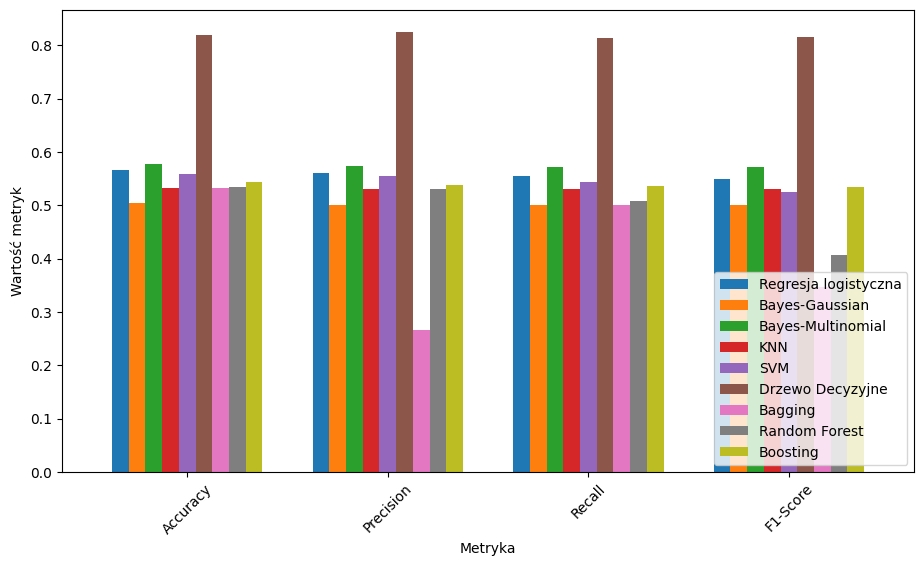

In [136]:
ax = df.plot(kind='bar', figsize=(11, 6), width=0.75)
ax.set_xlabel('Metryka')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Wartość metryk')
ax.legend(loc='lower right')
plt.show()

  Wśród analizowanych modeli uczenia maszynowego najlepsze wyniki osiągnęło Drzewo Decyzyjne (F-1 ok. 81%), co należy uznać za wynik dobry / bardzo dobry. Najsłabiej wypada Bagging, pozostałe osiągają podobne wartości na poziomie ok. 50 - 55%, co jednak znacznie ogranicza ich przydatność do użytku produkcyjnego.  
  
  Wśród rekomendacji dla dalszego rozwoju projektu należałoby wyróżnić:
  
  1. Poprawa jakościowa systemu zbierania danych. 
  
  2. Pobór danych z różnych okresów czasowych - porównanie danych z różnych okresów ułatwiłoby wyodrębnienie tych czynników,        które najszybciej wpływają, w przypadku niniejszego projektu, na decyzje o dalszym przebiegu kariery zawodowej. 
  
  3. Konteneryzacja modelu - przy wykorzystaniu narzędzia Docker. Jest to system, który pozwala uruchamiać aplikacje w                                      wyizolowanych środowiskach, tzw. kontenerach. Dostarcza aplikacjom zasoby warstwy sprzętowej
                             i systemowej, jednocześnie pozwala je wyizolować od innych aplikacji, dzięki czemu możemy
                             kontrolować konfigurację środowiska, w którym działa nasz kod (m.in. odpowiednie wersje bibliotek
                             dla modeli ML).